### Installing the libraries

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

In [66]:
import os
import mediapipe as mp

### Setting up the MediaPipe Holistic function for video formatting and setting up the camera

In [67]:
mp_holistic = mp.solutions.holistic #mediapipe holistic model
mp_drawing = mp.solutions.drawing_utils #dependancy for drawing out the utilities 

In [68]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting the color formatb from bgr to rgb
    image.flags.writeable = False                  #making the image non-writable
    results = model.process(image)                 #making the prediction
    image.flags.writeable = True                   #transforming the image back to the writable format 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #converting the color back to rgb 
    return image, results

### Function to get the features from the frames

In [69]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #for getting facial features
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) #for getting face outlines
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #for getting pose features
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #getting the left hand features
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #getting the right hand features

In [70]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
cap = cv2.VideoCapture(0)

In [71]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('b'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [72]:
results.face_landmarks

landmark {
  x: 0.5163580775260925
  y: 0.6814960241317749
  z: -0.018903318792581558
}
landmark {
  x: 0.5157981514930725
  y: 0.6489881873130798
  z: -0.035687100142240524
}
landmark {
  x: 0.5154993534088135
  y: 0.6579013466835022
  z: -0.018335143104195595
}
landmark {
  x: 0.5091584920883179
  y: 0.620724618434906
  z: -0.027445249259471893
}
landmark {
  x: 0.5156872868537903
  y: 0.6402751803398132
  z: -0.03806649148464203
}
landmark {
  x: 0.5152802467346191
  y: 0.6287244558334351
  z: -0.035539817065000534
}
landmark {
  x: 0.5141624808311462
  y: 0.6006571650505066
  z: -0.018386997282505035
}
landmark {
  x: 0.4667951464653015
  y: 0.5999958515167236
  z: 0.00602762121707201
}
landmark {
  x: 0.5138046741485596
  y: 0.5831100940704346
  z: -0.014861691743135452
}
landmark {
  x: 0.5137282609939575
  y: 0.572231650352478
  z: -0.016503458842635155
}
landmark {
  x: 0.5125018954277039
  y: 0.5268791317939758
  z: -0.008937602862715721
}
landmark {
  x: 0.516473650932312
  y

In [73]:
draw_landmarks(frame, results)

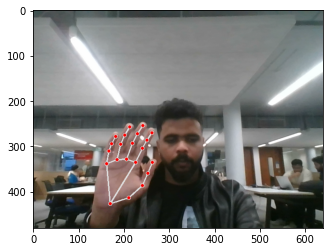

In [74]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 

### Extracting Keypoints - Demo function to extract the features along with the error handling

In [75]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [76]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

### Setting up folders for data

In [86]:
DATA_PATH = os.path.join('BSL_New') 
actions = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"])
no_sequences = 20 #number of videos used
sequence_length = 35 #number of frames in each of the videos

### Preprocessing and labelling of the data

In [87]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical #used for encoding categorical to int datatype

In [88]:
label_map = {label:num for num, label in enumerate(actions)}

In [89]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

### This function will be used for loading the recorded data

In [90]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action]) 

In [91]:
x= np.array(sequences)

In [92]:
np.array(labels).shape

(520,)

In [93]:
x.shape

(520, 35, 1662)

In [94]:
y = to_categorical(labels).astype(int)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)

In [96]:
x_val.shape #checking the shape of the validation data

(25, 35, 1662)

In [97]:
x_train.shape #checking the shape of the training data

(469, 35, 1662)

In [98]:
x_test.shape

(26, 35, 1662)

In [99]:
y_train.shape

(469, 26)

In [100]:
y_test.shape

(26, 26)

In [101]:
y_test #testing data in teh form of arrays

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

### Model creation of LSTM and training

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [103]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(35,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dropout(.4))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(.4))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(.25))
model.add(Dense(actions.shape[0], activation='softmax'))

In [129]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 35, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 35, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 26)                858       
                                                                 
Total params: 597,434
Trainable params: 597,434
Non-tr

In [104]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.001)

In [105]:
import tensorflow as tf

In [109]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [124]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100) 

Epoch 1/100
15/15 [==============================] - 31s 1s/step - loss: 1.8510 - categorical_accuracy: 0.3433 - val_loss: 1.8515 - val_categorical_accuracy: 0.3200
Epoch 2/100
15/15 [==============================] - 5s 334ms/step - loss: 1.8043 - categorical_accuracy: 0.3092 - val_loss: 1.9887 - val_categorical_accuracy: 0.1600
Epoch 3/100
15/15 [==============================] - 3s 183ms/step - loss: 1.8572 - categorical_accuracy: 0.2751 - val_loss: 1.7481 - val_categorical_accuracy: 0.4000
Epoch 4/100
15/15 [==============================] - 3s 179ms/step - loss: 1.8970 - categorical_accuracy: 0.2665 - val_loss: 1.7038 - val_categorical_accuracy: 0.3600
Epoch 5/100
15/15 [==============================] - 3s 206ms/step - loss: 1.8013 - categorical_accuracy: 0.3134 - val_loss: 1.7593 - val_categorical_accuracy: 0.4000
Epoch 6/100
15/15 [==============================] - 3s 177ms/step - loss: 1.6464 - categorical_accuracy: 0.4136 - val_loss: 1.6627 - val_categorical_accuracy: 0.3600


Epoch 50/100
15/15 [==============================] - 2s 147ms/step - loss: 2.0463 - categorical_accuracy: 0.2665 - val_loss: 2.2812 - val_categorical_accuracy: 0.2400
Epoch 51/100
15/15 [==============================] - 2s 152ms/step - loss: 2.2218 - categorical_accuracy: 0.1962 - val_loss: 2.0274 - val_categorical_accuracy: 0.4000
Epoch 52/100
15/15 [==============================] - 2s 152ms/step - loss: 2.0189 - categorical_accuracy: 0.2665 - val_loss: 1.9125 - val_categorical_accuracy: 0.4000
Epoch 53/100
15/15 [==============================] - 2s 140ms/step - loss: 1.9288 - categorical_accuracy: 0.3134 - val_loss: 1.7936 - val_categorical_accuracy: 0.4400
Epoch 54/100
15/15 [==============================] - 2s 150ms/step - loss: 1.8159 - categorical_accuracy: 0.3561 - val_loss: 1.9259 - val_categorical_accuracy: 0.3600
Epoch 55/100
15/15 [==============================] - 2s 143ms/step - loss: 1.7720 - categorical_accuracy: 0.3646 - val_loss: 1.7145 - val_categorical_accuracy:

Epoch 99/100
15/15 [==============================] - 2s 144ms/step - loss: 1.2661 - categorical_accuracy: 0.5672 - val_loss: 2.2497 - val_categorical_accuracy: 0.4000
Epoch 100/100
15/15 [==============================] - 2s 147ms/step - loss: 1.4823 - categorical_accuracy: 0.4563 - val_loss: 2.0786 - val_categorical_accuracy: 0.3600


In [126]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [127]:
import matplotlib.pyplot as plt

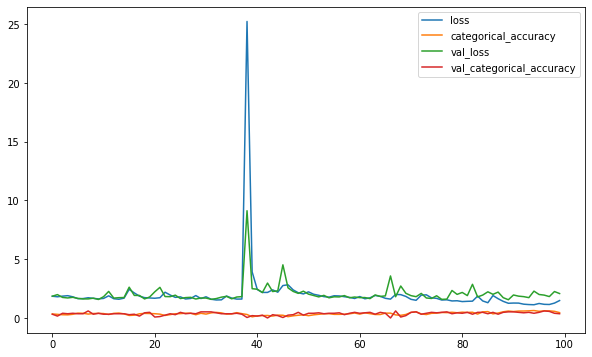

In [130]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()

In [132]:
model.predict(x_test)

1/1 [==============================] - 6s 6s/step


array([[1.60863751e-03, 9.84269306e-02, 1.72602668e-05, 2.99940377e-01,
        2.66412720e-02, 1.26710698e-01, 3.59830633e-03, 1.81325287e-01,
        3.86627018e-02, 8.92826766e-02, 2.27952376e-02, 1.69955585e-02,
        9.05431435e-02, 1.24974386e-03, 1.84162800e-05, 2.18358962e-03,
        3.59668767e-10, 7.73087063e-12, 2.78099410e-08, 6.53876231e-10,
        4.49695668e-16, 7.37396429e-12, 1.96730410e-09, 2.35390054e-08,
        1.66149155e-15, 5.99255090e-10],
       [2.05625454e-03, 8.28882828e-02, 1.43023526e-05, 2.82678813e-01,
        3.01494561e-02, 1.54714286e-01, 3.11881606e-03, 2.05265939e-01,
        3.88453826e-02, 6.31871745e-02, 2.13438664e-02, 1.49344290e-02,
        9.69311744e-02, 1.53583870e-03, 1.91001182e-05, 2.31679901e-03,
        3.55902668e-10, 6.48724130e-12, 4.02072828e-08, 4.98542874e-10,
        4.03644816e-16, 7.48413571e-12, 2.22436825e-09, 2.02700026e-08,
        1.42735968e-15, 7.43033579e-10],
       [1.04330333e-07, 2.18852688e-06, 1.26686894e-09

In [133]:
res = model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [134]:
model.predict(x_train).shape

15/15 [==============================] - 5s 155ms/step


(469, 26)

In [135]:
actions[np.argmax(res[4])]

'N'

In [136]:
actions[np.argmax(y_test[4])]

'W'

In [143]:
model.save('BSL_LSTM_.h5')

In [138]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [139]:
yhat = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [140]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [141]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[25,  0],
        [ 0,  1]],

       [[25,  0],
        [ 1,  0]],

       [[25,  0],
        [ 0,  1]],

       [[24,  0],
        [ 0,  2]],

       [[24,  1],
        [ 1,  0]],

       [[25,  0],
        [ 0,  1]],

       [[23,  1],
        [ 1,  1]],

       [[25,  1],
        [ 0,  0]],

       [[25,  0],
        [ 0,  1]],

       [[23,  0],
        [ 1,  2]],

       [[25,  1],
        [ 0,  0]],

       [[23,  2],
        [ 1,  0]],

       [[23,  1],
        [ 0,  2]],

       [[25,  1],
        [ 0,  0]],

       [[24,  0],
        [ 1,  1]],

       [[24,  0],
        [ 2,  0]],

       [[24,  1],
        [ 0,  1]],

       [[24,  1],
        [ 0,  1]],

       [[23,  0],
        [ 1,  2]],

       [[25,  0],
        [ 1,  0]]], dtype=int64)

In [142]:
accuracy_score(ytrue, yhat)

0.6153846153846154

In [ ]:
sequence = []
sentence = []
threshold = 0.8
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[-35:]
        
        if len(sequence) == 35:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('b'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()